# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('otto_group.csv')
data.head(3)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1


In [3]:
# check if there are missing values
data.isna().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

In [4]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [5]:
data['target'].value_counts()

target
Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: count, dtype: int64

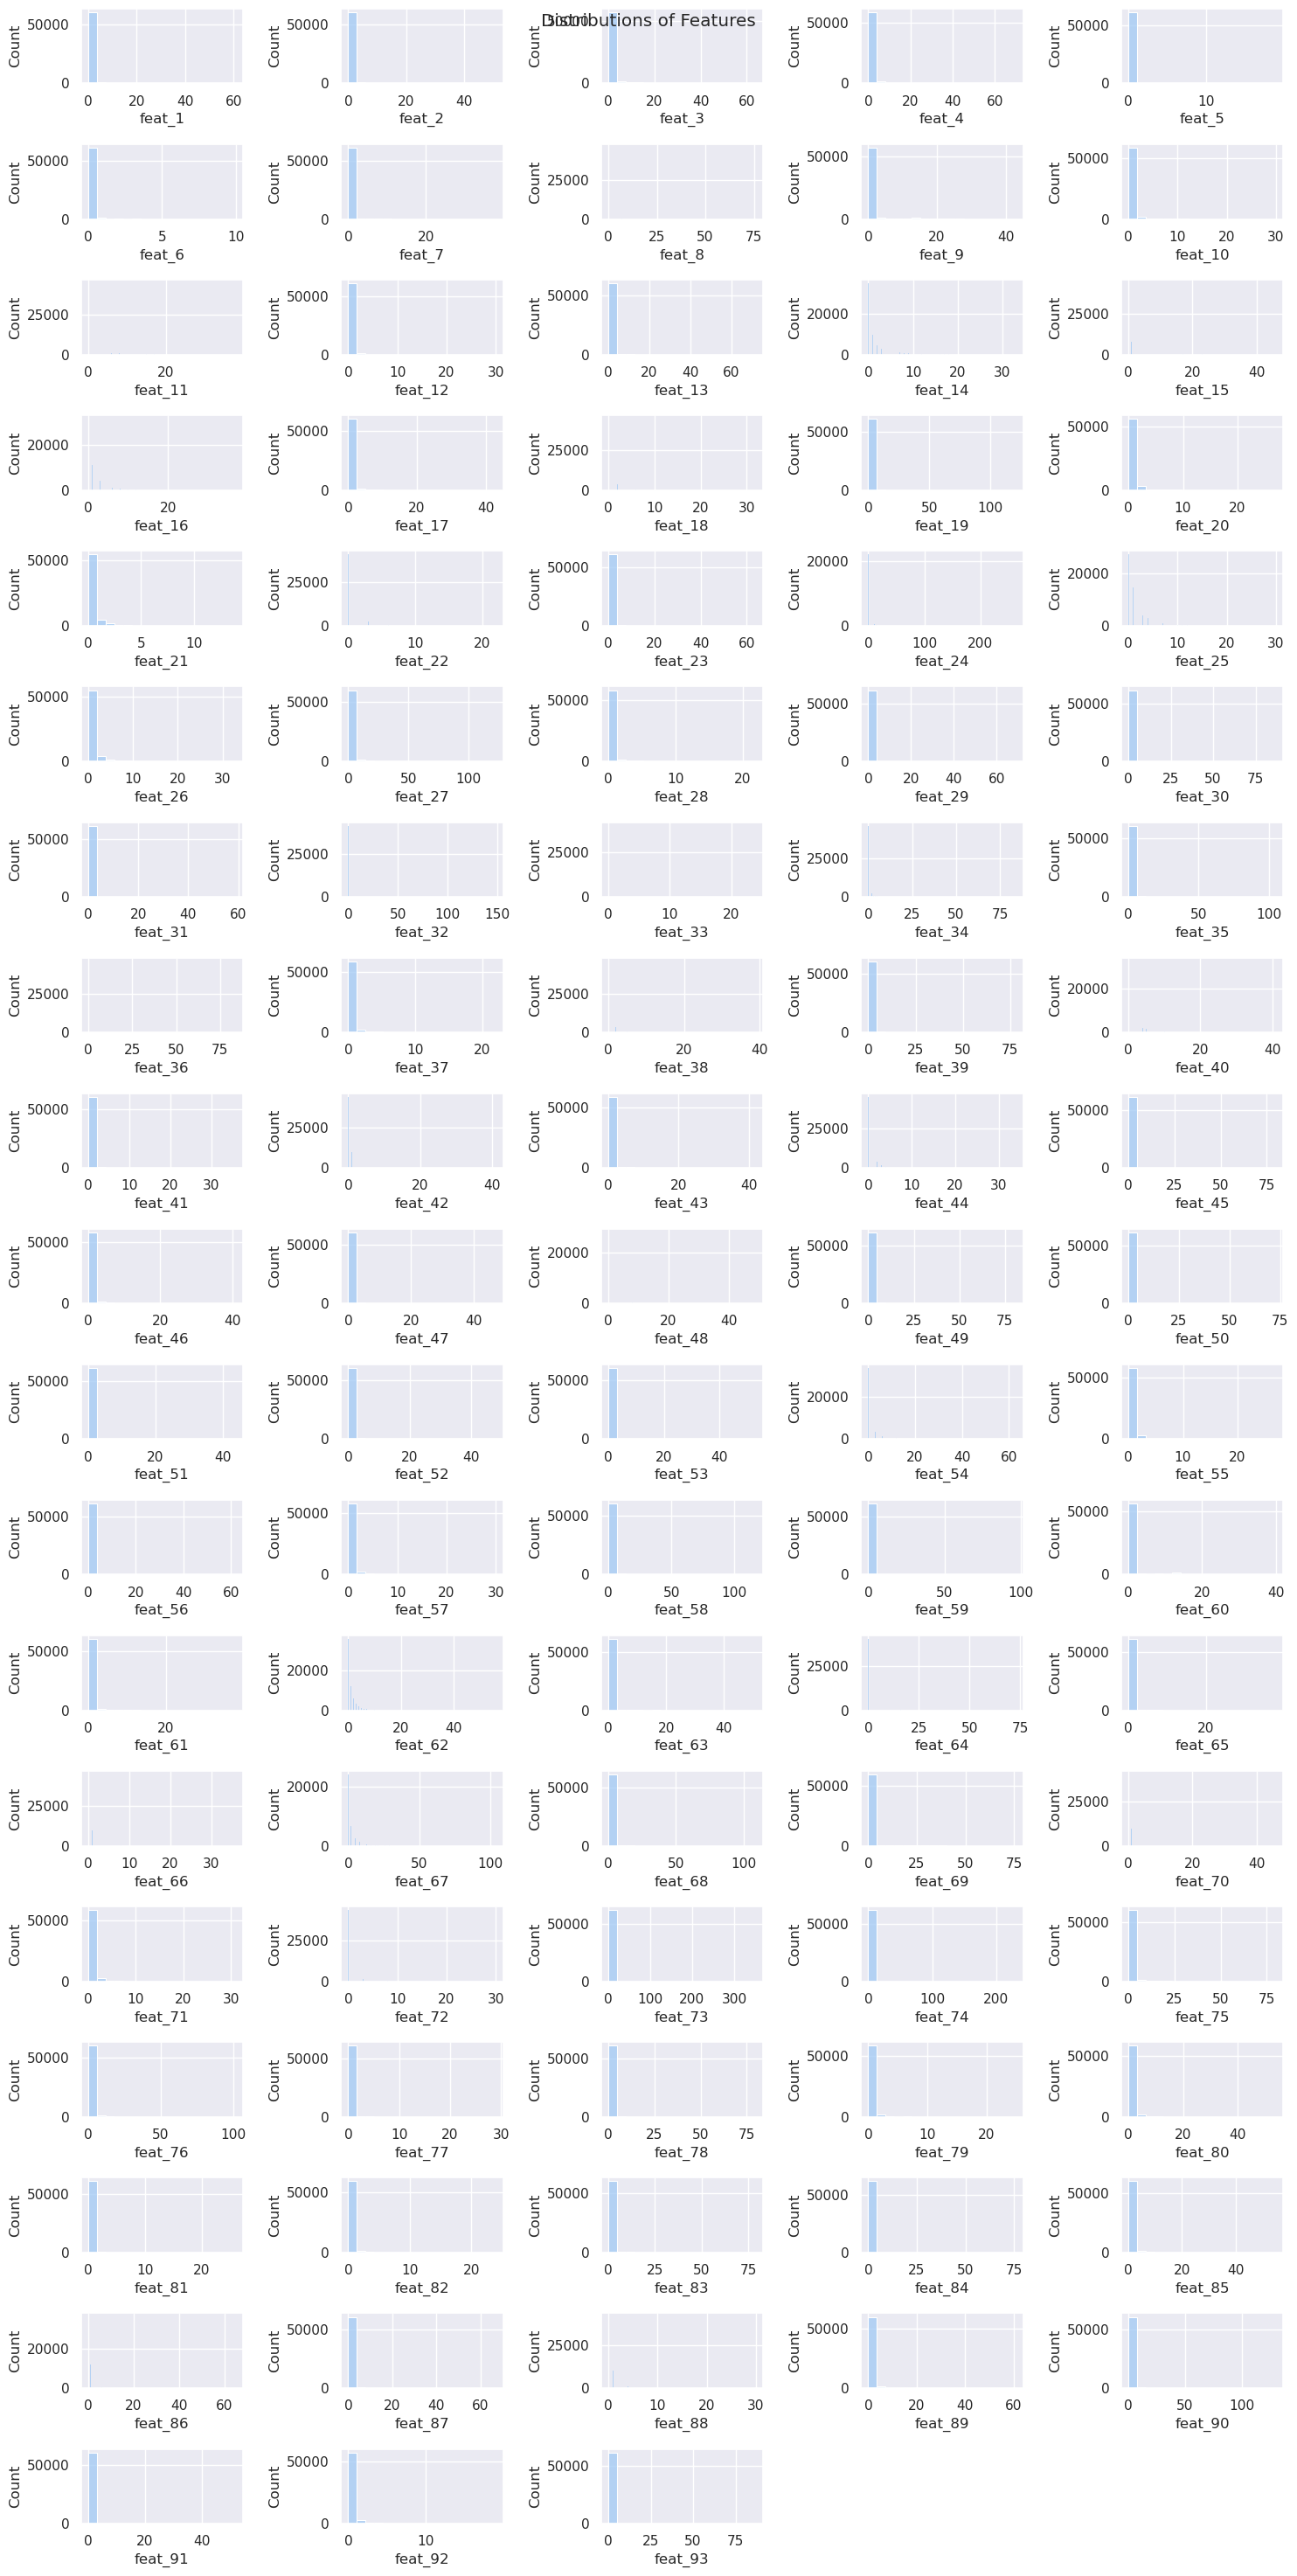

In [6]:
sns.set_theme(context='notebook', style='darkgrid', palette='pastel')

fig = plt.figure(figsize=(15,30))
features = data.columns[1:-1]
for index, feature in enumerate(features):
    ax = plt.subplot(19, 5, index+1)
    sns.histplot(data=data, x=feature)

plt.suptitle('Distributions of Features')
plt.tight_layout();
plt.show()

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

In [7]:
data['feat_1'].value_counts()

feat_1
0     51483
1      5906
2      1829
3       981
4       521
5       471
6       207
7       192
8        71
9        55
22       32
11       24
10       15
13       10
15        8
26        6
12        5
24        5
19        5
23        4
17        4
28        4
14        4
21        4
48        3
16        3
27        3
25        3
31        2
39        2
42        2
30        2
47        2
43        2
29        1
61        1
37        1
32        1
20        1
40        1
56        1
34        1
Name: count, dtype: int64

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

<Axes: >

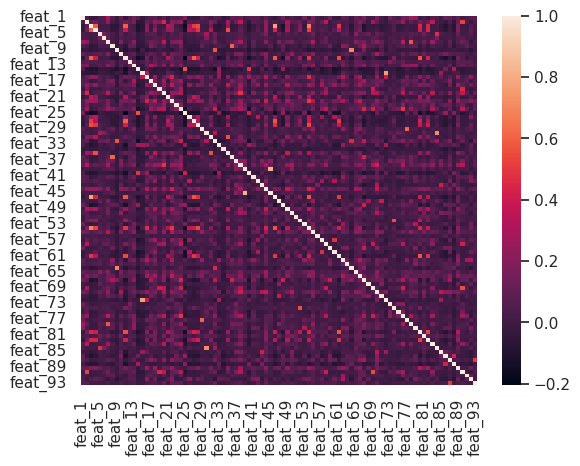

In [8]:
feat = data.loc[:, 'feat_1':'feat_93']
sns.heatmap(data[features].corr())

Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [9]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [10]:
pca_1 = PCA(n_components=20)
pca_2 = PCA(n_components=40)
pca_3 = PCA(n_components=60)

principalComponents = pca_1.fit_transform(feat)
principalComponents = pca_2.fit_transform(feat)
principalComponents = pca_3.fit_transform(feat)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=27)
principalComponents = pca.fit_transform(feat)
print(np.sum(pca.explained_variance_ratio_))

0.7275541266110102
0.8885821965628469
0.9598158642406337
0.8003787846334203


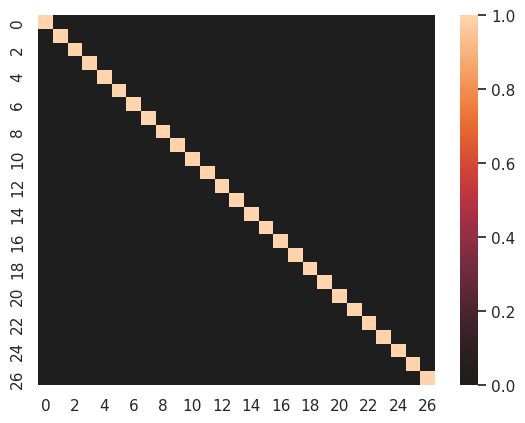

In [11]:
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [12]:
y = data['target']
X = data.loc[:, 'feat_1':'feat_93']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [14]:
# Construct some pipelines
pipe_lr = Pipeline([('pca', PCA(n_components=27, random_state=123)), 
                    ('clf', LogisticRegression(random_state=123))])

# Fit the pipelines
pipe_lr.fit(X_train, y_train)

print(pipe_lr.score(X_test, y_test))

0.7279411764705882


/home/murithi/anaconda3/envs/learn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
np.sum(pipe_lr.predict(X_test) == y_test)/len(y_test)

0.7279411764705882

## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [16]:
from sklearn import svm
from sklearn import tree

pipe_svm = Pipeline([('pca', PCA(n_components=27)), 
                     ('clf', svm.SVC(random_state=123))])
        
pipe_tree = Pipeline([('pca', PCA(n_components=27)), 
                      ('clf', tree.DecisionTreeClassifier(random_state=123))])

pipe_rf = Pipeline([('pca', PCA(n_components=27)), 
                    ('clf', RandomForestClassifier(random_state=123))])

# List of pipelines and pipeline names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

Pipeline(steps=[('pca', PCA(n_components=27)), ('clf', SVC(random_state=123))])
Pipeline(steps=[('pca', PCA(n_components=27)),
                ('clf', DecisionTreeClassifier(random_state=123))])
Pipeline(steps=[('pca', PCA(n_components=27)),
                ('clf', RandomForestClassifier(random_state=123))])
Support Vector Machine pipeline test accuracy: 0.755
Decision Tree pipeline test accuracy: 0.669
Random Forest pipeline test accuracy: 0.772


## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [17]:
# Construct pipeline
pipe_rf = Pipeline([('pca', PCA(n_components=27)), 
                    ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf, 
                     param_grid=param_grid_forest, 
                     scoring='accuracy', 
                     cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120; total time=  19.6s
[CV] END clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120; total time=  18.4s
[CV] END clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120; total time=  18.8s
[CV] END clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120; total time=  19.7s
[CV] END clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120; total time=  19.6s
[CV] END clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120; total time=  19.7s
[CV] END clf__criterion=entropy, clf__max

Use your grid search object along with `.cv_results` to get the full result overview

In [18]:
gs_rf.cv_results_

{'mean_fit_time': array([18.70770288, 19.43214138, 16.62119579, 12.58635108, 12.44091241,
        12.77932771,  7.92434335, 10.58979138, 12.32291373, 33.67068895,
        24.28670533, 20.16298723, 12.60872436, 12.04102604, 12.26613204,
         5.80509837,  7.88233765,  7.17468381, 20.12538528, 18.88446426,
        16.10215314, 11.77230477, 11.81675259, 11.68948325,  5.71198432,
         5.86518296,  5.64333725,  9.68957289,  9.71923383,  8.68276747,
         8.09247478,  7.36457459,  7.53368799,  4.58429297,  4.58718793,
         4.42307321, 10.45051662, 10.53116679,  8.94697142,  7.42581956,
         7.65219259,  8.97808043,  4.9517916 ,  4.5670073 ,  4.44005903,
        10.83627844, 10.6753362 ,  9.00628002,  7.50088708,  7.73328662,
         7.50973328,  4.50034237,  4.5710415 ,  4.54567838]),
 'std_fit_time': array([0.51166377, 0.07762191, 0.71012356, 0.65971304, 0.36984504,
        0.16155357, 2.40472128, 1.82111759, 3.93157378, 7.67416401,
        2.90802794, 3.4359198 , 0.37668

### AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostClassifier
# Construct pipeline
pipe_ab = Pipeline([('pca', PCA(n_components=27)), 
                    ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_ab.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_ab.best_score_)

# Best params
print('\nBest params:\n', gs_ab.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=30; total time=  10.0s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=30; total time=   8.9s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=30; total time=  13.5s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=  30.4s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=  22.2s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=  20.9s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=70; total time=  26.7s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=70; total time=  30.6s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=70; total time=  26.0s
[CV] END .......clf__learning_rate=0.5, clf__n_estimators=30; total time=  14.1s
[CV] END .......clf__learning_rate=0.5, clf__n_estimators=30; total time=  10.8s
[CV] END .......clf__learning_rate=0.5, clf__n_es

Use your grid search object along with `.cv_results` to get the full result overview: 

In [20]:
gs_ab.cv_results_

{'mean_fit_time': array([10.41279642, 24.02494136, 27.12585545, 12.22363647, 19.3011957 ,
        28.27497602, 10.88548843, 17.34969838, 22.12444154]),
 'std_fit_time': array([1.72051172, 4.24659922, 2.12820054, 1.3961379 , 3.30217935,
        4.39672809, 0.24336188, 0.42064002, 1.23499207]),
 'mean_score_time': array([0.37767975, 0.49644613, 0.65752212, 0.31408707, 0.40313808,
        0.61407042, 0.29443097, 0.3946774 , 0.46300944]),
 'std_score_time': array([0.22338338, 0.13746718, 0.1865752 , 0.03839084, 0.04600039,
        0.09899739, 0.0222317 , 0.0042114 , 0.05604471]),
 'param_clf__learning_rate': masked_array(data=[1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_clf__n_estimators': masked_array(data=[30, 50, 70, 30, 50, 70, 30, 50, 70],
              mask=[False, False, False, False, False, False, False, False,
       

### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [21]:
# FYI: This cell ran for 127 minutes 
# Construct pipeline
pipe_svm = Pipeline([('pca', PCA(n_components=27)), 
                     ('clf', svm.SVC(random_state=123))])

# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10] , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm, 
                      param_grid=param_grid_svm, 
                      scoring='accuracy', 
                      cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .....................clf__C=0.1, clf__kernel=linear; total time= 2.2min
[CV] END .....................clf__C=0.1, clf__kernel=linear; total time= 1.9min
[CV] END .....................clf__C=0.1, clf__kernel=linear; total time= 2.2min
[CV] END .......................clf__C=1, clf__kernel=linear; total time= 5.7min
[CV] END .......................clf__C=1, clf__kernel=linear; total time= 6.3min
[CV] END .......................clf__C=1, clf__kernel=linear; total time= 3.3min
[CV] END ......................clf__C=10, clf__kernel=linear; total time=21.5min
[CV] END ......................clf__C=10, clf__kernel=linear; total time=33.8min
[CV] END ......................clf__C=10, clf__kernel=linear; total time=17.0min
[CV] END ........clf__C=1, clf__gamma=0.001, clf__kernel=rbf; total time= 1.2min
[CV] END ........clf__C=1, clf__gamma=0.001, clf__kernel=rbf; total time= 1.2min
[CV] END ........clf__C=1, clf__gamma=0.001, clf_

Use your grid search object along with `.cv_results` to get the full result overview: 

In [22]:
gs_svm.cv_results_

{'mean_fit_time': array([ 108.22348857,  289.78812551, 1434.00712498,   46.13159641,
          62.5586826 ,   43.05918463,   61.89944323]),
 'std_fit_time': array([3.86585328e+00, 7.48382572e+01, 4.25484698e+02, 2.91664741e-01,
        2.67727344e+00, 2.51972616e+00, 2.76688797e-01]),
 'mean_score_time': array([17.86801362, 16.95290462, 12.3039542 , 24.66512314, 29.05047401,
        24.38813559, 26.2623268 ]),
 'std_score_time': array([4.89079482, 4.15546883, 0.0911402 , 0.36470755, 2.20305805,
        2.24658689, 0.33884607]),
 'param_clf__C': masked_array(data=[0.1, 1, 10, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_clf__kernel': masked_array(data=['linear', 'linear', 'linear', 'rbf', 'rbf', 'rbf',
                    'rbf'],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_clf__gamma': masked_array(data=

## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?